In [1]:
import pandas as pd # v 1.5.3
import numpy as np # v 1.21.5
import statsmodels.api as sm # v 0.13.5
import matplotlib.pyplot as plt # 3.6.3
import seaborn as sns #0. 12. 2


import warnings as ww
import statsmodels.tsa.stattools as stattools  # v 0.13.5

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

from statsmodels.tsa.stattools import adfuller # v 0.13.5
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # v 0.13.5
from statsmodels.tsa.arima_model import ARIMA # v 0.13.5

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv ("C:/Users/btomi/Downloads/sales_market_data.csv")

df.shape, df.columns, df.dtypes
#Importing the data and getting some general EDA

((992, 8),
 Index(['Sale', 'InStrSpending', 'Discount', 'TVSpending', 'StockRate', 'Price',
        'Radio', 'OnlineAdsSpending'],
       dtype='object'),
 Sale                   int64
 InStrSpending        float64
 Discount             float64
 TVSpending           float64
 StockRate            float64
 Price                float64
 Radio                  int64
 OnlineAdsSpending    float64
 dtype: object)

In [3]:
df.isna().sum()
#checking for missing values

Sale                 0
InStrSpending        0
Discount             0
TVSpending           0
StockRate            0
Price                0
Radio                0
OnlineAdsSpending    0
dtype: int64

In [4]:
df.describe()
#This gives me the summary statistics of the data set.

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,171327.118952,30.593034,0.251139,98.678740,0.494526,14.599829,1479.569556,1596.504284
std,81397.843301,17.493103,0.145348,57.117347,0.286810,8.715533,885.419636,927.474787
min,1992.000000,0.190000,0.000000,0.130000,0.000000,0.140000,4.000000,12.540000
25%,112479.250000,14.830000,0.130000,49.637500,0.250000,6.917500,708.250000,786.327500
50%,170390.500000,31.385000,0.250000,97.510000,0.490000,14.820000,1413.500000,1595.455000
75%,226027.250000,45.660000,0.380000,147.620000,0.740000,22.100000,2273.000000,2420.687500
max,393914.000000,59.960000,0.500000,199.910000,1.000000,29.990000,2997.000000,3198.270000


In [5]:
df['Sale'].describe()
#summary statistics for Sale

count       992.000000
mean     171327.118952
std       81397.843301
min        1992.000000
25%      112479.250000
50%      170390.500000
75%      226027.250000
max      393914.000000
Name: Sale, dtype: float64

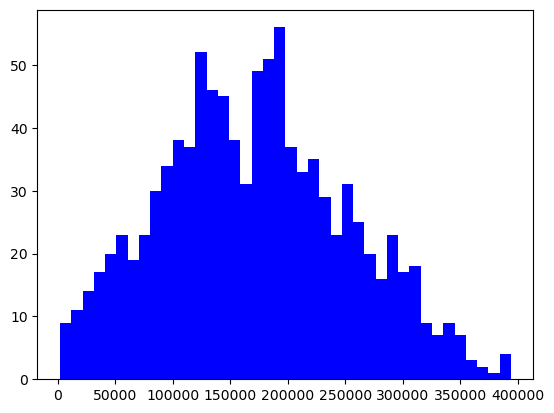

In [6]:
plt.hist(df['Sale'], bins=40, color='blue')
plt.show()
#Sale seems to have a normal distribution

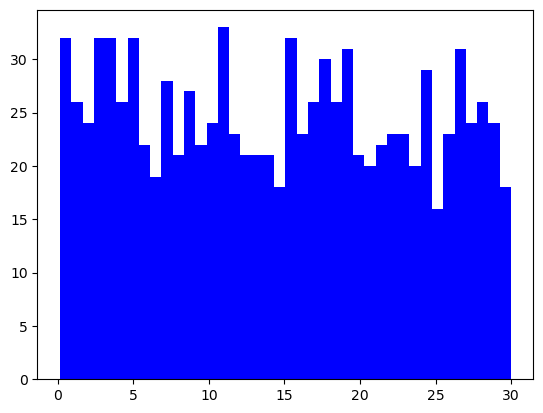

In [7]:
plt.hist(df['Price'], bins=40, color='blue')
plt.show() 
#price appears to have more of a uniform distribution if anything

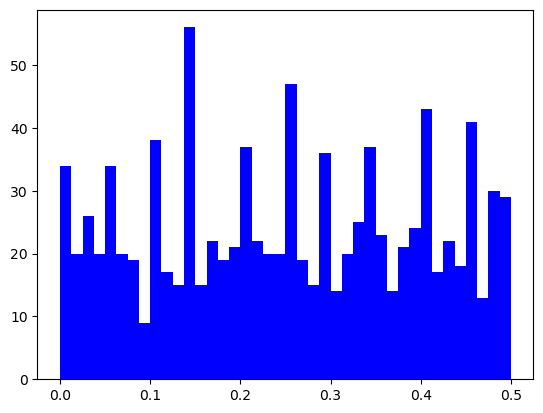

In [8]:
plt.hist(df['Discount'], bins=40, color='blue')
plt.show()
#Discount's distribution looks most similar to Price but no real consistent distribution 

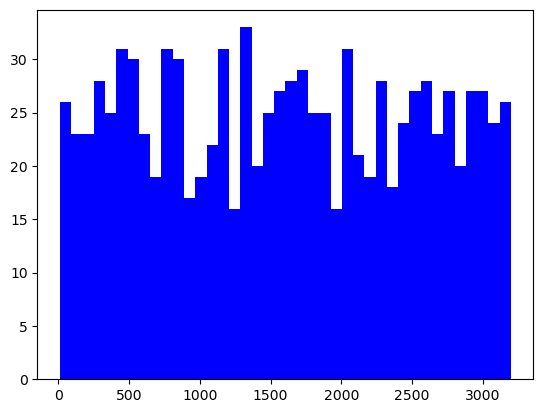

In [9]:
plt.hist(df['OnlineAdsSpending'], bins=40, color='blue')
plt.show()

In [10]:
correlation = df.corr()
print(correlation)
#Provides the correlations between the variables.

                       Sale  InStrSpending  Discount  TVSpending  StockRate  \
Sale               1.000000       0.577708  0.010998    0.413330  -0.072435   
InStrSpending      0.577708       1.000000  0.028830   -0.018534   0.031747   
Discount           0.010998       0.028830  1.000000   -0.013651  -0.012617   
TVSpending         0.413330      -0.018534 -0.013651    1.000000  -0.045078   
StockRate         -0.072435       0.031747 -0.012617   -0.045078   1.000000   
Price             -0.673372       0.044907  0.012604   -0.013569   0.036756   
Radio             -0.015362      -0.087285 -0.004328   -0.000920  -0.001413   
OnlineAdsSpending  0.042385       0.033268 -0.034600    0.012382  -0.004633   

                      Price     Radio  OnlineAdsSpending  
Sale              -0.673372 -0.015362           0.042385  
InStrSpending      0.044907 -0.087285           0.033268  
Discount           0.012604 -0.004328          -0.034600  
TVSpending        -0.013569 -0.000920           0.01

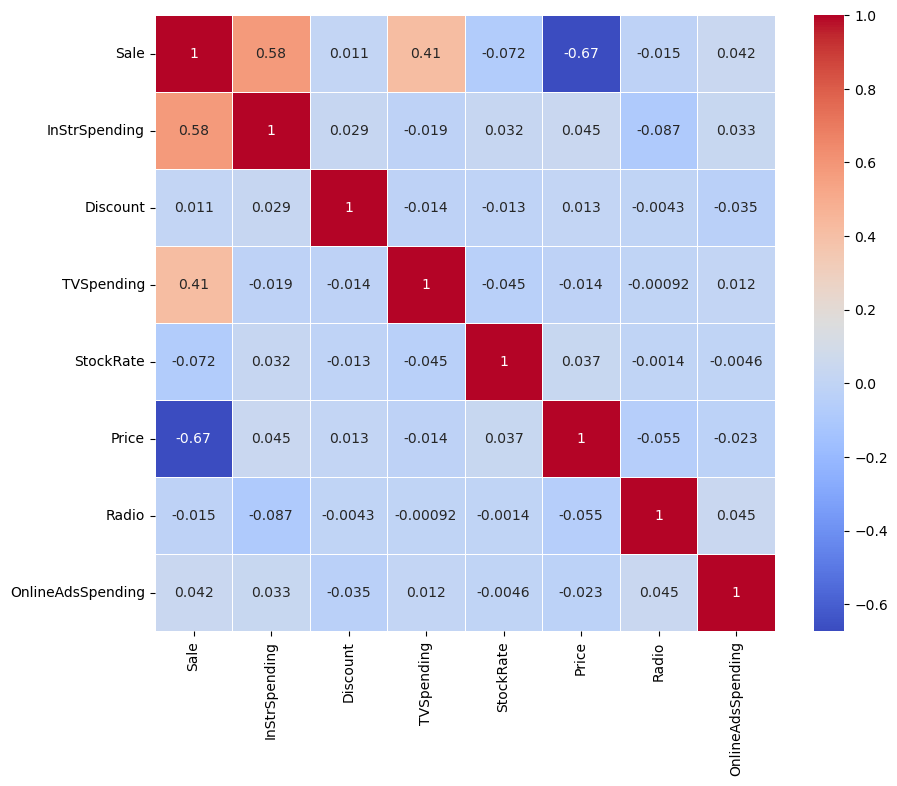

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()
#Produces a heatmap to better see the correlations. It appears InStrSpending and Sale have a mild, positive correaation, and price and sale have a relatively strong, negative correlation.

In [12]:
y = df["Sale"]
x = df.loc[:, df.columns != "Sale"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, )
#Seperate into training and test sets. Sale is the dependent variable. 

In [13]:
Decision_tree_reg = DecisionTreeRegressor()

# Fit the model on the training data
Decision_tree_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = Decision_tree_reg.predict(X_test)

In [14]:
features_names = x.columns
tree_rules = []

for feature, importance in zip(features_names, Decision_tree_reg.feature_importances_):
    tree_rules.append((feature, importance))
    
tree_rules.sort(key=lambda x: x[1], reverse=True)

print('Decision Rules: ')
for rule in tree_rules:
    print(f'Feature Name: {rule[0]}, Importance: {rule[1]}')

Decision Rules: 
Feature Name: Price, Importance: 0.49424418802276754
Feature Name: InStrSpending, Importance: 0.34014084854653015
Feature Name: TVSpending, Importance: 0.15329521613415922
Feature Name: StockRate, Importance: 0.004479114141559635
Feature Name: Radio, Importance: 0.003605155185889365
Feature Name: OnlineAdsSpending, Importance: 0.002234595752884209
Feature Name: Discount, Importance: 0.0020008822162099734


In [15]:
# We can see that price is the most important, meaning it has the largest influence in making predictions, while radio is the least important.

In [16]:
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(mse_tree)

515652070.2211055


In [17]:
lasso_reg = Lasso()

# Fit the model on the training data
lasso_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_reg.predict(X_test)

In [18]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(mse_lasso)

8827925.292668788


In [19]:
k_best_selector = SelectKBest(score_func=f_regression, k=4)
X_train_k = k_best_selector.fit_transform(X_train, y_train)
X_test_k = k_best_selector.transform(X_test)

In [20]:
bestsub_reg = LinearRegression()

# Fit the model on the selected features
bestsub_reg.fit(X_train_k, y_train)

# Make predictions on the test set
y_pred_best = bestsub_reg.predict(X_test_k)

In [21]:
# Evaluate the model
mse_best= mean_squared_error(y_test, y_pred_best)
print(mse_best)

8894784.994694004


In [22]:
# I used mean squared error as the error metric to evaluate the three models. When comparing, the Lasso regressor has the lowest MSE so I would choose that model.

In [23]:
Decision_tree_reg_2 = DecisionTreeRegressor(criterion='absolute_error', splitter='random')

# Fit the model on the training data
Decision_tree_reg_2.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree_2 = Decision_tree_reg_2.predict(X_test)

In [24]:
features_names = x.columns
tree_rules = []

for feature, importance in zip(features_names, Decision_tree_reg_2.feature_importances_):
    tree_rules.append((feature, importance))
    
tree_rules.sort(key=lambda x: x[1], reverse=True)

print('Decision Rules: ')
for rule in tree_rules:
    print(f'Feature Name: {rule[0]}, Importance: {rule[1]}')

Decision Rules: 
Feature Name: InStrSpending, Importance: 0.3507701010985802
Feature Name: Price, Importance: 0.34499660526679504
Feature Name: TVSpending, Importance: 0.21275265670220103
Feature Name: OnlineAdsSpending, Importance: 0.03091162983691519
Feature Name: Discount, Importance: 0.022173389120938358
Feature Name: Radio, Importance: 0.01940336086814225
Feature Name: StockRate, Importance: 0.018992257106427837


In [25]:
# When looking at the importance of the features from this model, we see price remains the most important, but now OnlineAdsSpending is the least important when predicting.

In [26]:
mse_tree_2 = mean_squared_error(y_test, y_pred_tree_2)
print(mse_tree_2)

550044844.7085427


In [27]:
#From both decision tree models as well as the Lasso and forward selection model, we can see that Price is the most predictive of the dependent variable Sale. We can also see that InStrSpending and TVSpending are predictive as well. 

In [28]:
df_nba = pd.read_csv ("C:/Users/btomi/Downloads/nba.csv")

df_nba.shape, df_nba.columns, df_nba.dtypes
#Importing the data and getting some general EDA

((1340, 21),
 Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
        '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
        'TOV', 'TARGET_5Yrs'],
       dtype='object'),
 Name            object
 GP               int64
 MIN            float64
 PTS            float64
 FGM            float64
 FGA            float64
 FG%            float64
 3P Made        float64
 3PA            float64
 3P%            float64
 FTM            float64
 FTA            float64
 FT%            float64
 OREB           float64
 DREB           float64
 REB            float64
 AST            float64
 STL            float64
 BLK            float64
 TOV            float64
 TARGET_5Yrs    float64
 dtype: object)

In [29]:
df_nba.describe()
#Summary statistics

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [30]:
df_nba.isna().sum()
#checking for missing values

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [31]:
df_NoMissing = df_nba.dropna()
#removing missing values

In [32]:
df_NoMissing.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,60.402558,17.647931,6.820166,2.634763,5.902483,44.117532,0.249661,0.785628,19.308126,1.302784,1.827314,70.407148,1.007600,2.021445,3.028442,1.558992,0.620391,0.366140,1.196012,0.621520
std,17.481092,8.327441,4.365671,1.686850,3.598820,6.119492,0.384608,1.063856,16.022916,0.989341,1.326655,10.489838,0.779178,1.362464,2.062357,1.474159,0.410533,0.428534,0.724470,0.485191
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.800000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.800000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.600000,2.100000,4.800000,43.900000,0.100000,0.300000,22.400000,1.000000,1.500000,71.300000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.800000,0.400000,1.200000,32.500000,1.700000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [33]:
df_NoMissing['PTS'].describe()
#summary statistics for PTS

count    1329.000000
mean        6.820166
std         4.365671
min         0.700000
25%         3.700000
50%         5.600000
75%         8.800000
max        28.200000
Name: PTS, dtype: float64

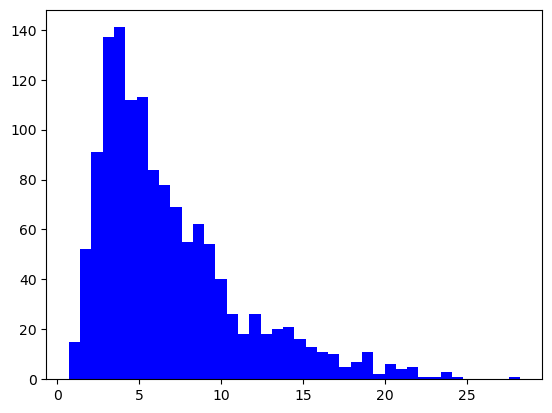

In [34]:
plt.hist(df_NoMissing['PTS'], bins=40, color='blue')
plt.show()
#We can see that PTS is scewed to the right and there appears to be a high outlier.

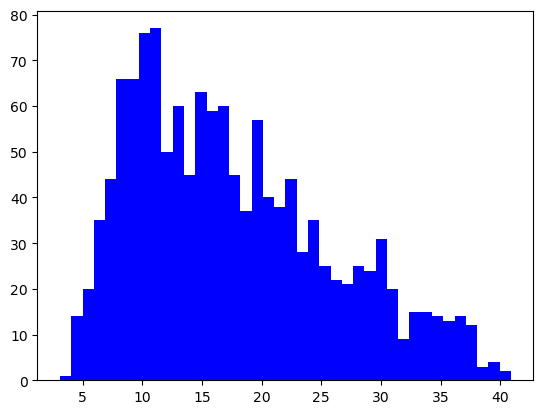

In [35]:
plt.hist(df_NoMissing['MIN'], bins=40, color='blue')
plt.show()
#MIN is also a bit scewed to the right.

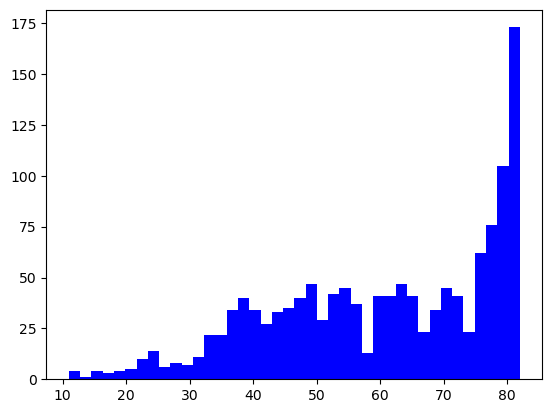

In [36]:
plt.hist(df_NoMissing['GP'], bins=40, color='blue')
plt.show()
#GP is scewed to the left, and a large amount seem to be at 80+.

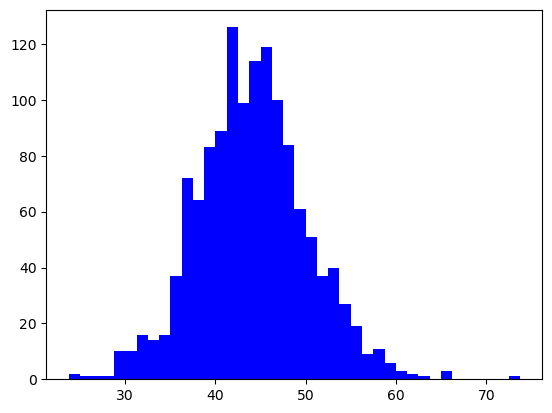

In [37]:
plt.hist(df_NoMissing['FG%'], bins=40, color='blue')
plt.show()
#FG% appears to have a normal distribution.

In [38]:
correlation_nba = df_NoMissing.corr()
print(correlation_nba)
#Provides the correlations between the variables.

                   GP       MIN       PTS       FGM       FGA       FG%  \
GP           1.000000  0.590596  0.539069  0.543000  0.517395  0.296987   
MIN          0.590596  1.000000  0.911746  0.902864  0.910194  0.208341   
PTS          0.539069  0.911746  1.000000  0.990874  0.979676  0.261587   
FGM          0.543000  0.902864  0.990874  1.000000  0.980117  0.297113   
FGA          0.517395  0.910194  0.979676  0.980117  1.000000  0.135815   
FG%          0.296987  0.208341  0.261587  0.297113  0.135815  1.000000   
3P Made      0.108195  0.389474  0.345289  0.287956  0.388860 -0.291573   
3PA          0.099626  0.402814  0.355198  0.297898  0.412053 -0.347680   
3P%          0.038209  0.165997  0.151072  0.119493  0.197160 -0.330690   
FTM          0.483185  0.791089  0.896245  0.848146  0.826244  0.253381   
FTA          0.480136  0.779813  0.880826  0.840667  0.805507  0.306360   
FT%          0.197743  0.236160  0.254404  0.219423  0.264405 -0.150996   
OREB         0.400184  0.

C:\Users\btomi\AppData\Local\Temp\ipykernel_18600\4150860599.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_nba = df_NoMissing.corr()


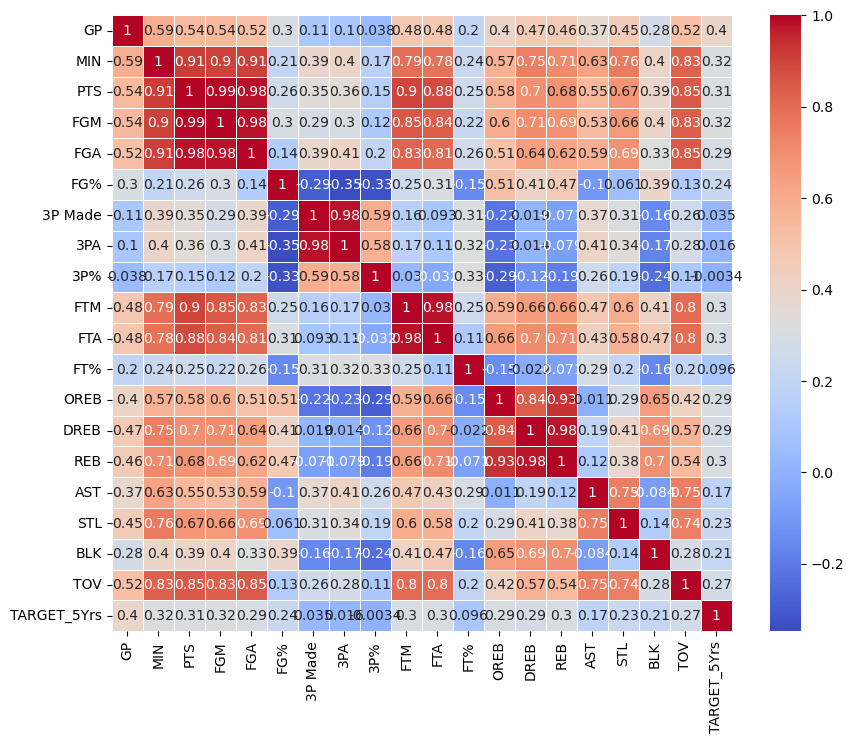

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_nba, annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()
#Produces a heatmap to better see the correlations.

In [40]:
df_NoMissing.TARGET_5Yrs.value_counts(normalize=True)
#We can see that about 62% of the players have played more than 5 years and about 38% have played less than 5. So the classes are a bit imbalanced but I do not think it requires sampling. 

1.0    0.62152
0.0    0.37848
Name: TARGET_5Yrs, dtype: float64

In [41]:
df_final=df_NoMissing.drop('Name', axis=1)
#Dropping the name variable before creating models since I believe it is unneccessary.

In [42]:
y2 = df_final["TARGET_5Yrs"]
x2 = df_final.loc[:, df_final.columns != "TARGET_5Yrs"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, )
#Seperate into training and test sets. TARGET_5Yrs is the dependent variable. 

In [43]:
# Create a Decision Tree Classifier
tree_classifier = DecisionTreeClassifier()

# Fit the model on the training data
tree_classifier.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred_class = tree_classifier.predict(X_test2)

In [44]:
accuracy_nba1 = accuracy_score(y_test2, y_pred_class)
print(accuracy_nba1)

0.5989974937343359


In [45]:
precision_nba1 = precision_score(y_test2, y_pred_class, average='weighted')
print(precision_nba1)

0.5952174008034326


In [46]:
#I used accuracy and precision as my metrics. We can see that the decision tree accurately classified the correct predictions 59.6% of the time, and 60.2% of the time correcly identified true positives.

In [47]:
# Create a Decision Tree Classifier
tree_classifier2 = DecisionTreeClassifier(criterion='entropy', splitter='random')

# Fit the model on the training data
tree_classifier2.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred_class2 = tree_classifier2.predict(X_test2)

In [48]:
accuracy_nba2 = accuracy_score(y_test2, y_pred_class2)
print(accuracy_nba2)

0.6140350877192983


In [49]:
precision_nba2 = precision_score(y_test2, y_pred_class2, average='weighted')
print(precision_nba2)

0.6122031987599521


In [50]:
# The second decision tree had a lower accuracy and a lower precision. While it was only by a couple percent, I would prefer the first model.

In [51]:
features_names2 = x2.columns
tree_rules = []

for feature, importance in zip(features_names2, tree_classifier2.feature_importances_):
    tree_rules.append((feature, importance))
    
tree_rules.sort(key=lambda x: x[1], reverse=True)

print('Decision Rules: ')
for rule in tree_rules:
    print(f'Feature Name: {rule[0]}, Importance: {rule[1]}')


Decision Rules: 
Feature Name: FTM, Importance: 0.09184633595196064
Feature Name: OREB, Importance: 0.08483134131161144
Feature Name: FG%, Importance: 0.08205388195543342
Feature Name: GP, Importance: 0.0700934475485356
Feature Name: MIN, Importance: 0.05963497138644637
Feature Name: TOV, Importance: 0.05705395731232424
Feature Name: FT%, Importance: 0.05437188377716109
Feature Name: STL, Importance: 0.05409583260747017
Feature Name: 3P%, Importance: 0.05401708804596494
Feature Name: AST, Importance: 0.045194021765857205
Feature Name: FGM, Importance: 0.04464364000420033
Feature Name: DREB, Importance: 0.04462683538541119
Feature Name: PTS, Importance: 0.04148025372493015
Feature Name: 3PA, Importance: 0.04084744055421862
Feature Name: FTA, Importance: 0.0396655974624411
Feature Name: REB, Importance: 0.03664276954337277
Feature Name: 3P Made, Importance: 0.03405723827215614
Feature Name: BLK, Importance: 0.03403753962472863
Feature Name: FGA, Importance: 0.03080592376577587


In [52]:
#Obviously games played would be the most important when predicting target years. FT% is the next most important which I find interesting but can see that this may be considered important for an NBA player's career. 3P% is one of the least important which I found interesting because I would assume someone with a high percentage would end up playing longer.